# Matplotlib & plotly libraries

How can we improve standard `matplotlib` charts with an interactive `plotly` package?



In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

**Data source:**

https://catalog.data.gov/dataset/electric-vehicle-population-data

In [9]:
# Data import
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

print(data.head().to_string())

   VIN (1-10)    County      City State  Postal Code  Model Year    Make       Model                   Electric Vehicle Type             Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  Legislative District  DOL Vehicle ID             Vehicle Location                               Electric Utility  2020 Census Tract
0  2T3YL4DV0E      King  Bellevue    WA      98005.0        2014  TOYOTA        RAV4          Battery Electric Vehicle (BEV)                       Clean Alternative Fuel Vehicle Eligible           103.0        0.0                  41.0       186450183   POINT (-122.1621 47.64441)  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10
1  5YJ3E1EB6K      King   Bothell    WA      98011.0        2019   TESLA     MODEL 3          Battery Electric Vehicle (BEV)                       Clean Alternative Fuel Vehicle Eligible           220.0        0.0                   1.0       478093654  POINT (-122.20563 47.76144)  PUGET SOUND ENERGY INC||

In [15]:
# Count occurences of each car producer
counts = Counter(data['Make'])

# Sort categories by count in descending order
sorted_categories = sorted(counts.keys(), key = lambda x: counts[x], reverse = True)
sorted_counts = [counts[cat] for cat in sorted_categories]

['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA', 'BMW', 'TOYOTA', 'HYUNDAI', 'RIVIAN', 'JEEP', 'VOLKSWAGEN', 'VOLVO', 'AUDI', 'CHRYSLER', 'MERCEDES-BENZ', 'HONDA', 'SUBARU', 'PORSCHE', 'POLESTAR', 'MINI', 'CADILLAC', 'MITSUBISHI', 'MAZDA', 'LEXUS', 'FIAT', 'DODGE', 'LUCID', 'LINCOLN', 'GENESIS', 'GMC', 'SMART', 'JAGUAR', 'FISKER', 'ACURA', 'LAND ROVER', 'ALFA ROMEO', 'TH!NK', 'BRIGHTDROP', 'LAMBORGHINI', 'BENTLEY', 'ROLLS-ROYCE', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'VINFAST', 'MULLEN AUTOMOTIVE INC.', 'RAM']


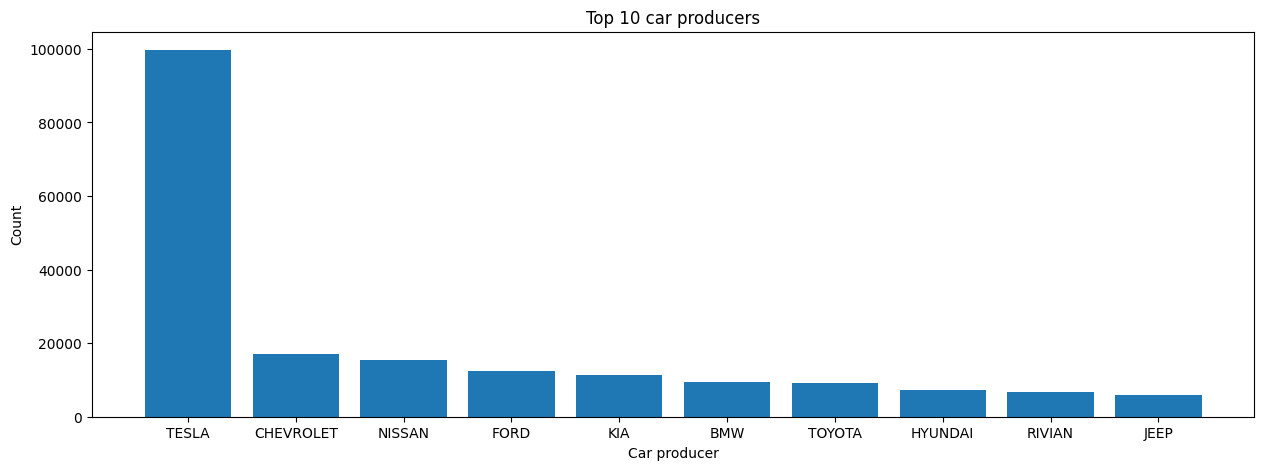

In [25]:
# Make the matplotlib plot
fig = plt.figure(figsize = (15, 5))

plt.bar(sorted_categories[0:10], sorted_counts[0:10])
plt.xticks(rotation = 0)
plt.xlabel("Car producer")
plt.ylabel("Count")
plt.title("Top 10 car producers")
plt.show()

In [33]:
# Plotly interactive version
import plotly.express as px

fig = px.histogram(data,
                   x = 'Make')

fig.update_xaxes(categoryorder = 'total descending',
                 range = [0, 9]) # Display only the top 10 car producers

fig.update_layout(title = {'text': 'Top 10 car producers on the market',
                  'x': 0.5,
                  'xanchor': 'center'})

fig.show()

## Second plotly histogram

Global distribution of the models of the most dominant car producers

*(with more than 5000 cars registered)*



In [39]:
count = data['Make'].value_counts() > 5000

fig =  px.histogram(data[data['Make'].isin(count[count==True].index.values)],
                    x = 'Model',
                    color = 'Make',
                    color_discrete_sequence = px.colors.qualitative.Set3)

fig.update_xaxes(categoryorder = 'total descending')
fig.show()

## Sunburst chart

In [41]:
fig = px.sunburst(data,
                  path = ['Make',
                          'Model'])

fig.update_layout(width = 800,
                  height = 800,
                  title = {'text': 'Proportion of each vehicle producer along with their models',
                           'x': 0.5,
                           'xanchor': 'center'})
fig.show()

## Interactive scatter plot

Each electric vehicle has an electric range for its batteries.
The electric range is the maximum distance an electric vehicle can travel on a fully charged battery.

How did the range of EVs evolve over the past few years?

In [50]:
colors = {
    'Clean alternative fuel vehicle eligible': 'green',
    'Not eligible due to low battery range': 'red'
    }

# First, let's eliminate the unknown eligibility from the dataset
known_eligibility = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!='Eligibility unknown as battery range has not been researched']

fig = px.scatter(known_eligibility,
                 x = 'Model Year',
                 y = 'Electric Range',
                 color = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                 color_discrete_map= colors)

fig.update_layout(title = {'text': 'Electric range of eligible and non eligible clean alternative fuel vehicle',
                           'x': 0.5,
                           'xanchor': 'center'})
fig.show()